# Hypothesentest: Verteilungsfunktionen 

Oft ist die theoretische Verteilungsfunktion einer beobachteten Messgröße bzw. Zufallsvariablen nicht bekannt. Dann werden Annahmen über die zugrundeliegende statistische Verteilungsfunktion gemacht. Wir behandeln im folgenden, wie man diese Annahmen überprüft. Diese Art von Hypothesentest wird auch Anpassungstest genannt.

Es gibt verschiedene Hypothesentests, um zu untersuchen, ob eine beobachtete Häufigkeitsverteilung mit einer theoretischen Verteilungsfunktion in statistischer Übereinstimmung ist. Im Gegensatz zu anderen Hypothesentests ist die Annahme der Nullhypothese erwünscht, d.h. dass die Verteilungsanpassung als statistisch vertretbar gewertet wird.

Zwei wichtige Anpassungstests sind der Chi-Quadrat und der Kolomogorow-Smirnow-Test (KS-Test). Im Gegensatz zum Chi-Quadrat-Test ist der KS-Test auch für kleine Stichproben geeignet und robuster gegenüber Extremwerten. Der KS-Test kann auch zur Prüfung verwendet werden, ob zwei Zufallsvariablen die gleiche Verteilung besitzen.


Literatur C.D. Schönwiesse, "Praktische Statistik", Kapitel 8.2.10

## Problemstellung Anpassungstest: Vergleich einer empirischen Stichprobe (SP) mit einer theoretischen Grundgesamtheit (GG) 

Gegeben sei eine beobachtete Häufigkeitsverteilung für eine beliebige Anzahl Stichproben.

Frage: sind beobachtete und theoretische Häufigkeitsverteilung im Einklang? Oft reicht ein Test nicht aus, um die Frage zu beantworten. Der Chi-Quadrat-Test ist anfällig gegenüber kleinen Abweichungen in den Randbereichen der Häufigkeitsverteilung. Daher sollte eine Ablehnung der Nullhypothese noch durch einen alternativen Test (z.B. KS-Test) verifiziert werden.

### $\chi²$-Test
Für eine hinreichend große Stichprobe liefert der $\chi^2$-Test eine Antwort.Gegeben sei $H_k(SP)$, die Häufigkeitsverteilung der Stichprobe (SP), die Häufigkeitsverteilung $H_k(GG)$ der Grundgesamtheit (GG: theoretische Verteilung). Die Testgröße $\chi^2$ berechnet sich aus

$$\bar{\chi}^2=\sum_{k=1}^K\frac{ [H_k(SP)-H_k(GG)]^2}{H_k(GG)}$$

mit Freiheitsgrad $\Phi=K-Z$, wobei K die Klassenanzahl und $Z$ die Anzahl der geschätzten Parameter der Verteilungsfunktion ist. Wird z.B. der Mittelwert $\mu$ und die Standardabweichung $\sigma$ aus der Stichprobe geschätz, so wird $Z=2$ und der Freiheitsgrad reduziert sich um zwei.

## Kolmogoroff-Smirnoff-Test (KS-Test)

Die Prüfgröße $\hat{P}$ des KS-Tests berechnet sich aus

$$\hat{P}=\frac{\left|Max(KH_k(SP)-KH_k(GG))\right|}{n}$$

im Gegensatz zum  $\chi^2$-Test wird beim KS-Test mit den kumulativen Häufigkeiten gerechnet. Die Prüfgröße $\hat{P}$ wird mit einem Tabellenwert $P_{n,\alpha}$ verglichen, dabei gibt $n$ den Stichprobenumfang und $\alpha$ die Irrtumswahrscheinlichkeit an. 

Für eine Stichprobenanzahl $n>35$ gilt die Näherung 

$$P_{n,\alpha}=\frac{\sqrt{-\frac{1}{2}\ln\frac{\alpha}{2}}}{\sqrt{n}}$$

In [9]:
%pylab inline
sqrt(-0.5*log(0.2/2))

Populating the interactive namespace from numpy and matplotlib


1.0729830131446736

Populating the interactive namespace from numpy and matplotlib
#### Fall 1 ####
Chi2:  11.8139627074
Chi2_scipy:  (11.813962707443345, 0.066250102156389018)
--------------------
#### Fall 2 ####
Chi2:  2186.14210402
Chi2_scipy:  (2186.1421040180235, 0.0)
--------------------


`%matplotlib` prevents importing * from pylab and numpy


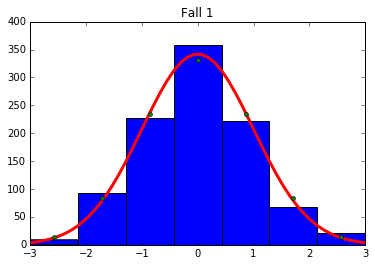

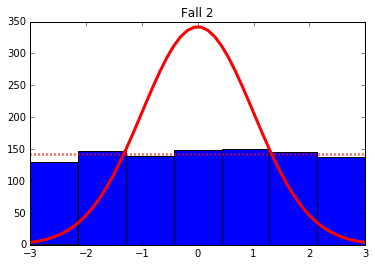

In [33]:
%pylab inline
import scipy.stats as stats

N=1000 # Anzahl Stichproben
K=7 # Anzahl Klassen
r=3.0 # +- Rand des Histograms

z1=randn(N)
z2=rand(N)*r*2-r

figure(1)
H1=hist(z1,range=[-r,r],bins=K)
x=linspace(-r,r)
plot(x,stats.norm.pdf(x)*N/K*(2*r),'r-',linewidth=3)

x1=H1[1][1:]
x2=H1[1][:-1]
plot(x1+(x2-x1)/2,(stats.norm.cdf(x1)- stats.norm.cdf(x2))*N,'go',markersize=4)
title('Fall 1')
# Die theoretische Haeufigkeit wird durch das Integral unter der Kurve (=CDF) berechnet 

figure(2)
H2=hist(z2,range=[-r,r],bins=K)
plot(x,stats.norm.pdf(x)*N/K*(2*r),'r-',linewidth=3)
plot(x,ones(len(x))*float(N)/(K),'r:',linewidth=3)
title('Fall 2')
Hk_SP1=H1[0]
Hk_GG1=(stats.norm.cdf(x1)- stats.norm.cdf(x2))*N

###############################################
print("#### Fall 1 ####")
#print("Stichprobe: \n",Hk_SP1)
#print("GG:  \n", Hk_GG1)

chi2=sum((Hk_SP1-Hk_GG1)**2/Hk_GG1)
chi2_scipy=stats.chisquare(Hk_SP1,Hk_GG1) # Alternative Berechnung mit scipy.stats

print("Chi2: ",chi2)
print("Chi2_scipy: ",chi2_scipy)
print("--------------------")

Hk_SP2=H2[0]
Hk_GG2=(stats.norm.cdf(x1)- stats.norm.cdf(x2))*N

# Richtige Verteilung
#Hk_GG2=ones(len(x1))*float(N)/(K)

print("#### Fall 2 ####")
#print("Stichprobe: \n",Hk_SP2)
#print("GG:  \n", Hk_GG2)

chi2=sum((Hk_SP2-Hk_GG2)**2/Hk_GG2)
chi2_scipy=stats.chisquare(Hk_SP2,Hk_GG2)

print("Chi2: ",chi2)
print("Chi2_scipy: ",chi2_scipy)
print("--------------------")

### Was bedeutet der Wert von $\chi^2$ ?

**Je größer der Wert von $\chi^2$ ist, desto schlechter ist die Anpassung der beobachteten Häufigkeitsverteilung mit der theoretischen Verteilung.**

### Wie sind die statistische Folgerungen?

Folgerungen können nur im statistischen Sinne gemacht werden. Wir können aus einer Tabelle der Quantile der $\chi^2$-Verteilung die Wahrscheinlichkeiten in Abhängigkeit der Freiheitsgerade $\Phi=K-Z$ bestimmen. 

Im obigen Fall testen wir, ob die Verteilung einer Standard-Normalverteilung folgt.  Die Standard-Normalverteilung hat keine freien Parameter. Die Anzahl der Klassen $K$ (Bins des Histogramms) beträgt $K=7$. Daher folgt für unser Beispiel $Z=0$ und $\Phi=K-Z$, d.h. $\Phi=7$. Der Wert $\chi^2$ ist kleiner als der tabellierte Wert $\chi^2=12.017$ bei einem Signifikanzniveau von 90%. 

Wir können als die Aussagen formulieren:

 * Fall1: Die beobachtete Häufigkeitsverteilung  folgt einer Standard-Normalverteilung. Die Nullhypothese wird nicht zurückgewiesen.

 * Fall2: Die beobachtete Häufigkeitsverteilung ist nicht normalverteilt. Die Nullhypothese wird zurückgewiesen.

## Quantile der $\chi^2$-Verteilung

Vergleiche Schönwiese A.4 (S. 288) oder [Tabelle der Quantile der Chi-Quadrat-Verteilung](https://de.wikipedia.org/wiki/Chi-Quadrat-Test)

In [24]:
stats.chi2.ppf(0.9,7)

12.017036623780527

In [44]:
F=[1,2,3,4,5,6,7,8,9,10,20,50,100]
alpha=[0.1,0.9,0.95,0.99]
print('f   1-a\t0.1\t0.9\t0.95\t0.99')
for f in F:
    L=str(f)+'\t'
    for a in alpha:
        L+=str('%3.2f'%stats.chi2.ppf(a,f))+'\t'
    print(L)

f   1-a	0.1	0.9	0.95	0.99
1	0.02	2.71	3.84	6.63	
2	0.21	4.61	5.99	9.21	
3	0.58	6.25	7.81	11.34	
4	1.06	7.78	9.49	13.28	
5	1.61	9.24	11.07	15.09	
6	2.20	10.64	12.59	16.81	
7	2.83	12.02	14.07	18.48	
8	3.49	13.36	15.51	20.09	
9	4.17	14.68	16.92	21.67	
10	4.87	15.99	18.31	23.21	
20	12.44	28.41	31.41	37.57	
50	37.69	63.17	67.50	76.15	
100	82.36	118.50	124.34	135.81	


# Bedeutung von Si und $\alpha$ ?

In der Tabelle werden die $\chi^2$-Werte von links nach rechts stetig größer. Was bedeutet das für die Wahl des Signifikanzniveaus?

Beim Anpassungstest möchte man i.A. zeigen, dass eine Verteilung geeignet ist, d.h. die Nullhypothese bestätigen und nicht widerlegen. Die Nullhypothese ist, dass theoretische und beobachtete Verteilungsfunktionen übereinstimmen.

Beträgt nun z.B. Si=95%, so ist die Irrtumswahrscheinlichkeit 5% (0.05), d.h. die Nullhypothese wird mit einer Irrtumswahrscheinlichkeit von 5% akzeptiert. Für Si=50% beträgt die Irrtumswahrscheinlichkeit 50% (0.5). Es ist genauso wahrscheinlich, wie unwahrscheinlich, dass die Nullhypothese akzeptiert bzw. abgelehnt wird. Das entsprechende $\chi^2$ ist aber kleiner! Ist dies eine logische Inkonsistenz? - Nein

Das Beispiel unten zeigt, dass bei einer Irrtumswahrscheinlichkeit von 99% etwa 99% der Nullhypothesen zurückgewiesen wird, obwohl die Stichprobe aus der theoretisch richtigen Verteilungsfunktion. Die Irrtumsrate kann also als "False-Hit-Rate" bzw. fehlerhafte Warnung bezeichnet werden. Nur die fast perfekte Übereinstimmung wird bei einer Irrtumswahrscheinlichkeit von 99% akzeptiert. 

Alpha=  0.99
Nullhypothese wird abgelehnt -> CHI2= 1.6531976213
Nullhypothese wird abgelehnt, Anzahl Fälle:  9918  insgesamt: 10000
Nullhypothese wird abgelehnt, Anzahl Fälle: [%]  99.18


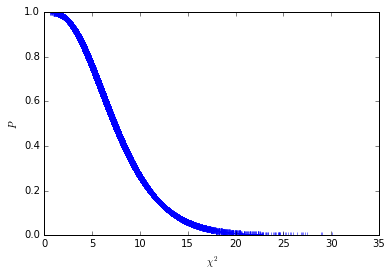

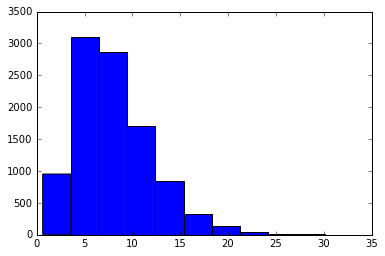

In [39]:
M=10000 # 10000 Monte-Carlo Experimente

N=1000 # Anzahl Stichproben
K=9 # Anzahl Klassen
r=1.5 # Rand des Histograms

CHI2=zeros(M)
P=zeros(M)

for i in range(M):
    z1=randn(N)
    z2=rand(N)*r*2-r
    H1=histogram(z1,range=[-r,r],bins=K)

    x1=H1[1][1:]
    x2=H1[1][:-1]
    H2=histogram(z2,range=[-r,r],bins=K)

    Hk_SP1=H1[0]
    Hk_GG1=(stats.norm.cdf(x1)- stats.norm.cdf(x2))*N

    (chi2_scipy,p)=stats.chisquare(Hk_SP1,Hk_GG1)#,ddof=K-2-1) 
    CHI2[i]=chi2_scipy
    P[i]=p
    
alpha=0.99    
print('Alpha= ',alpha)
print('Nullhypothese wird abgelehnt -> CHI2=', min(CHI2[P<alpha]))
print('Nullhypothese wird abgelehnt, Anzahl Fälle: ', sum(P<alpha), ' insgesamt:',M)
print('Nullhypothese wird abgelehnt, Anzahl Fälle: [%] ', sum(P<alpha)*100.0/M)

figure(3)
plot(CHI2,P,'+')
xlabel('$\chi^2$')
ylabel('$P$')

figure(4)
h=hist(CHI2)

## Kolmogoroff-Smirnoff-Anpassungstest

### Beispiel Octave/Matlab

Wir testen, ob eine Gleichverteilung vorliegt.

In [22]:
alpha=0.05;
for i=1:10 % 10x Wiederholen
    x=rand(20,1);
    p_ks=kolmogorov_smirnov_test(x, "unif", 0, 1);
    disp(p_ks)
    if p_ks<alpha
        disp('Ablehnung der Nullhypothese')
    endif
end

 0.14132
 0.63298
 0.037375
Ablehnung der Nullhypothese
 0.42045
 0.65971
 0.22831
 0.46875
 0.66596
 0.46248
 0.30763


## $\chi^2$-Verteilung Octave
### Quantile

In [4]:
chi2inv(0.9,7)

ans =  12.017


### PDF und CDF

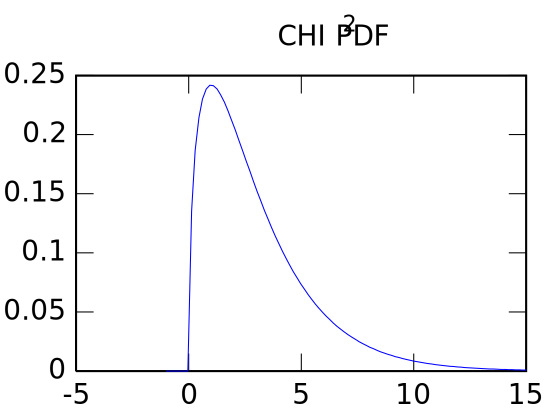

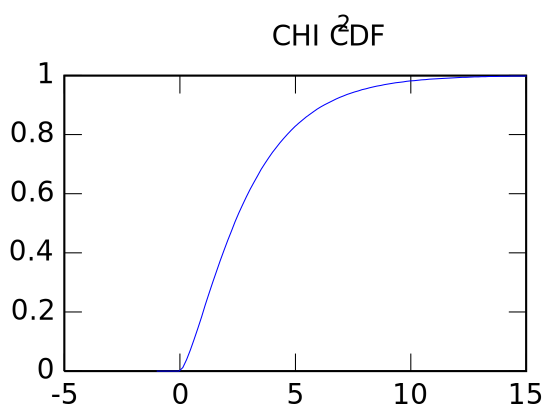

In [14]:
x=linspace(-1,15);
plot(x,chi2pdf(x,3));
title('CHI^2 PDF');
figure()
plot(x,chi2cdf(x,3));
title('CHI^2 CDF');

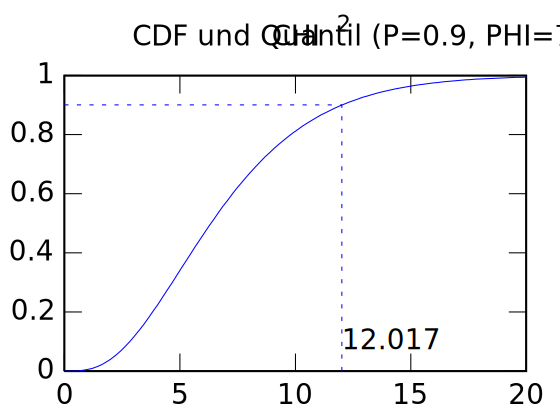

In [28]:
figure()
x=linspace(0,20);
phi=7;
plot(x,chi2cdf(x,phi));
hold()
y=0.9;
q=chi2inv(y,phi);
x1=[q,q];
y1=[0,y];
plot(x1,y1,':');
x2=[0,q];
y2=[y,y];
plot(x2,y2,':');
text(q,0.1,num2str(q))
title('CHI^2 CDF und Quantil (P=0.9, PHI=7)');

# Signifikanz von Trends

## Meereis-Ausdehnung

Populating the interactive namespace from numpy and matplotlib


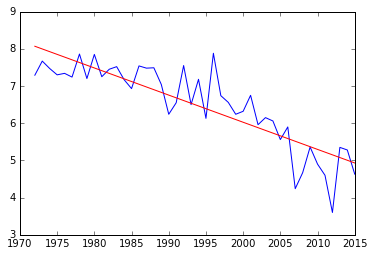

In [32]:
%pylab inline
N=44
t=linspace(1972,1972+N-1,N)
Y=loadtxt("../stunde3/september_extent_1972_2015.txt")[0:N]
plot(t,Y)
p = polyfit(t,Y,1)
y_line=p[0]*t+p[1]
plot(t,y_line,"r")

Y_o=Y.copy()

M=10000
a=zeros(M)
for i in range(M):
    shuffle(Y)
    p = polyfit(t,Y,1)
    a[i]=p[0]


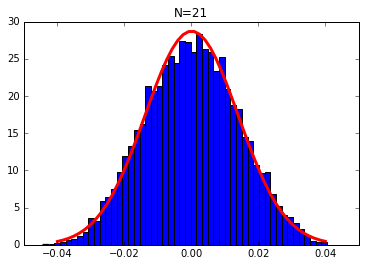

In [13]:
m=mean(a)
s=std(a)
x=linspace(-0.04,0.04)
figure()
h=hist(a,bins=50,normed=True)
y=normpdf(x,m,s)
plot(x,y,'r',linewidth=3)
title('N=21')

In [23]:
p = polyfit(t,Y_o,1)
p

array([ -2.62597403e-02,   5.93529957e+01])

In [15]:
p[0]/s

-1.8902327505001972

In [17]:
import scipy.stats as stats
stats.norm.cdf(-1.89)


0.029378980040409432

Der beobachete Trend liegt -1.89 $\sigma$ vom Nullpunkt der Monte-Carlo-Gesamtheit entfernt. Dies entspricht einer Warscheinlichkeit von etwa 3%, dass es sich um einen rein zufälligen Trend handelt. Die Nullhypothese (kein Trend) wird zurückgewiesen.

## Ab wann ist der Trend signifikant?

Betrachte p-Wert als Funktion der Zeit.

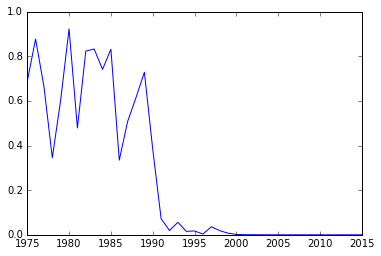

In [30]:
import scipy.stats as stats
M0,M1=3,44
P=zeros(M1)
P[:]=nan
for n in range(M0,M1):
    slope, intercept, r_value, p_value, std_err = stats.linregress(t[0:n],Y_o[0:n])
    P[n]=p_value

plot(t,P)

# Pandas für Zeitreihenanalyse
## Beispiel Seismische Daten - Bestimmung der Wiederholrate

### Motivation

Gibt es einen Zusammenhang zwischen Gasförderung und Erdbeben?

Literatur: http://www.nature.com/news/energy-production-causes-big-us-earthquakes-1.13372

### Daten
Datenquelle: U.S. Geological Survey http://earthquake.usgs.gov/earthquakes/search/ 

Region: US-Bundesstaat Oklahamo

Andere Datenquellen: [GEOFON](http://geofon.gfz-potsdam.de/) (Archiv in Potsdam)

### Methode

 * Bestimmung der zeitlichen Abstände zwischen zwei Erdbeben der Stärke 3. 
 * Berechnung der Wiederholperiode aus aufeinanderfolgenden Ereignissen. 

Inspirationsquelle für die folgende Datenanalyse: https://tamino.wordpress.com/2015/04/24/oklahoma-not-ok/

# Beispiel Python-Code

## Einlesen

Importieren des Pandas-Moduls, Einlesen, Umsortieren und Darstellen des Tabellenkopfes.

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
d=pd.read_csv("oklahoma_usgs.csv",parse_dates=[0]) # Einlesen
d=d[::-1] # Umsortieren: älteste Daten an den Anfang 
d.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
5364,1974-12-16 02:30:21.400,35.330,-97.480,10,2.6,ml,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:27.851Z,"Oklahoma City urban area, Oklahoma",earthquake,NaN,NaN,NaN,NaN,reviewed,m,tul
5363,1980-11-02 10:00:49.300,35.472,-97.777,8,3.0,NaN,NaN,NaN,NaN,NaN,...,2014-11-06T23:24:27.049Z,Oklahoma,earthquake,NaN,NaN,NaN,NaN,reviewed,g,tul
5362,1981-07-11 21:09:22.540,34.884,-97.677,5,3.5,mblg,NaN,NaN,NaN,NaN,...,2014-11-07T00:29:46.469Z,Oklahoma,earthquake,NaN,NaN,NaN,NaN,reviewed,tul,tul
5361,1984-01-06 17:14:49.800,36.160,-95.580,5,2.6,md,NaN,NaN,NaN,NaN,...,2014-11-07T00:34:21.755Z,Oklahoma,earthquake,NaN,NaN,NaN,NaN,reviewed,tul,tul
5360,1984-03-03 11:42:02.400,35.510,-96.300,5,2.6,mblg,NaN,NaN,NaN,NaN,...,2014-11-07T00:34:35.307Z,Oklahoma,earthquake,NaN,NaN,NaN,NaN,reviewed,tul,tul


## Pandas Zeitserien-Objekte

Ein Pandas-Zeitserien-Objekt besteht aus Werten und einem (Zeit-)Index. Der Index ermöglicht eine einfache Weiterbearbeitung.

In [3]:
E=pd.Series(d['mag'].values,index=d['time']) # Generiere Zeitserienobjekt 
E.head()

time
1974-12-16 02:30:21.400    2.6
1980-11-02 10:00:49.300    3.0
1981-07-11 21:09:22.540    3.5
1984-01-06 17:14:49.800    2.6
1984-03-03 11:42:02.400    2.6
dtype: float64

In [4]:
P=E['1980':'1984'] # Selektiere Zeitraum
P=P[P.values>=3.0] # Nur Ereignisse >= 3
P

time
1980-11-02 10:00:49.300    3.0
1981-07-11 21:09:22.540    3.5
dtype: float64

In [5]:
dt=P.index[1]-P.index[0] # Zeitliche Differenz aus dem Index 
#ergibt eine datetime.timedelta-Objekt
dt.days # Uns interessieren nur die Tage

251

## Das vollständige Programm

Einlesen, Berechnung, Darstellen in weniger als 20 Zeilen.

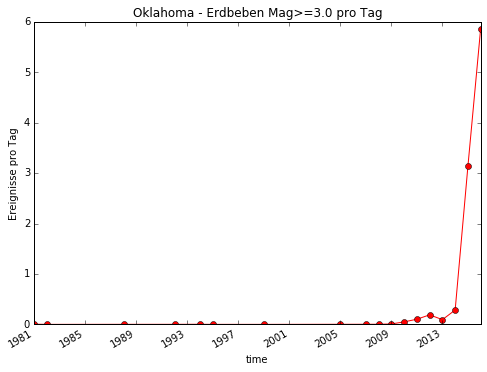

In [6]:
#Einlesen
d=pd.read_csv("oklahoma_usgs.csv",parse_dates=[0]) # Einlesen 
d=d[::-1] #Umsortieren
E=pd.Series(d['mag'].values,index=d['time'])

# Berechnung
Mag=3.0
E=E[E.values>=Mag]
E1, E2=E.index[1:], E.index[:-1]
dt = [(E1[i]-E2[i]).days for i in range(len(E1))] # -> List comprehension!
DT=pd.Series(dt,index=E2) # Generiere neues Zeitserienobjekt aus Zeitdifferenzen
DT_mean=DT.resample('A-DEC',how='mean').dropna() # Annual Mean bis Dezember / entferne NaN
F=1/DT_mean # Frequenz bzw. Wiederholrate

# Darstellen
figure(1,figsize=(8,6))
F['1975':'2015'].plot(style='ro-')
title('Oklahoma - Erdbeben Mag>='+str(Mag)+' pro Tag')
ylabel('Ereignisse pro Tag')

## Octave-Version 

Datumsfunktionen und Zeitserienobjekte sind in Octave/Matlab so wie oben nicht verfügbar. Die Umsetzung der obigen Methode bleibt als Übung.

In [21]:
d=csvread("oklahoma_usgs.csv");

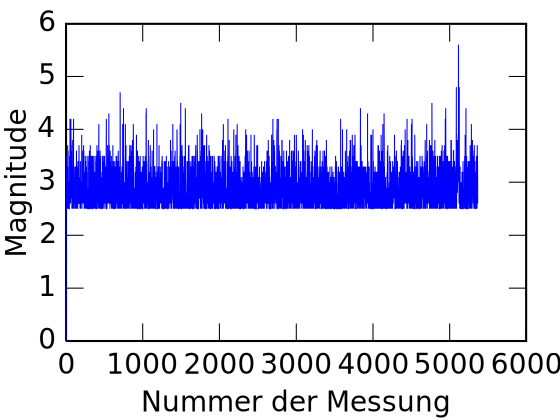

In [4]:
plot(d(:,5));
xlabel('Nummer der Messung');
ylabel('Magnitude');

In [23]:
m=d(2:5366,5);

In [13]:
size(m)

ans =

   5366      1



In [24]:
unique(m)

ans =

   2.5000
   2.6000
   2.7000
   2.8000
   2.9000
   3.0000
   3.1000
   3.2000
   3.3000
   3.4000
   3.5000
   3.6000
   3.7000
   3.8000
   3.9000
   4.0000
   4.1000
   4.2000
   4.3000
   4.4000
   4.5000
   4.7000
   4.8000
   5.6000



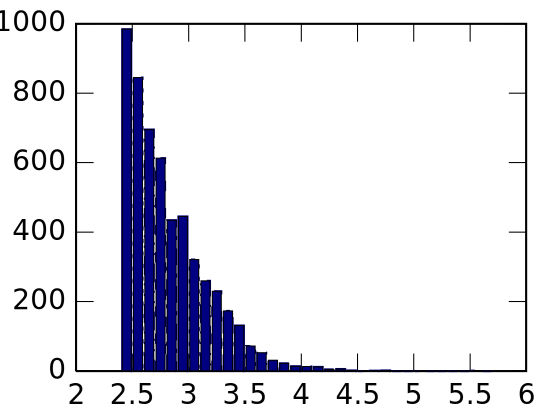

In [29]:
hb=2.45:0.1:5.65;
hist(m,hb)

# Wahrscheinlichkeitsrechnung - Wiederholperiode

Sei $P$ die Wahrscheinlichkeit für das Auftreten eines Ereignisses in einem Zeitraum $\Delta T$, dann berechnet sich die Wiederholperiode $\tau$ aus

$$\tau=\frac{\Delta T}{P}$$

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
p=0.5

In [4]:
n=4
p**n

0.0625

In [6]:
n=5
p**n

0.03125

In [8]:
n=7
p**n

0.0078125

In [11]:
n=30
p30=p**n

In [12]:
p5=p**5

In [13]:
1/p5

32.0

In [14]:
32*5

160

Wenn es 5 Sekunden für 5 Würfe dauert, ist zu erwarten, dass nach 160 Sekunden (=32 Versuche a 5 Sekunden) 1x das Ereignis 5* Wappen auftritt

In [17]:
1/p30*30/60/60/24/365

1021.443896499239

## Jahrtausendereignis
30 * Wappen dauert > 1000 Jahre
